In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from torch import nn

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
data = pd.read_csv("/content/gdrive/MyDrive/fin_quotes_per_day.csv")
data

,Date,GAZP,YNDX,RUAL,IRAO,GMKN,LKOH,MGNT,MTSS,NVTK,PLZL,ROSN,SBER,SNGS,TATN,CHMF
0,2015-03-30,137.00,887.0,37.340,1.0450,10530.0,2657.0,11185.0,246.30,432.0,1028.0,247.50,63.01,35.690,278.9,657.00
1,2015-03-31,138.90,893.0,36.790,1.0999,10399.0,2705.0,11350.0,247.00,432.0,1016.5,252.15,62.88,35.100,287.0,658.00
2,2015-04-01,143.00,902.0,35.825,1.1200,10539.0,2755.0,11750.0,250.90,450.3,1028.0,261.35,64.50,35.990,300.1,644.50
3,2015-04-02,143.90,919.0,36.450,1.1034,10090.0,2780.5,11971.0,250.00,467.2,1011.0,262.55,65.92,37.000,301.5,643.00
4,2015-04-03,143.94,940.0,36.720,1.1050,10237.0,2824.8,11799.0,248.60,476.4,1013.0,263.70,65.50,36.690,299.0,641.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2165,2023-11-28,164.21,2602.6,37.850,4.2080,17056.0,7238.0,6347.5,261.25,1509.2,11195.0,589.90,279.91,32.000,641.2,1304.20
2166,2023-11-29,163.17,2574.0,37.285,4.1510,16922.0,7202.0,6377.5,256.50,1493.6,11079.5,593.45,276.80,31.810,638.7,1297.20
2167,2023-11-30,163.23,2523.4,36.650,4.1470,16736.0,7239.0,6354.0,254.45,1510.0,10798.0,584.30,277.50,31.570,638.8,1268.20
2168,2023-12-01,162.61,2420.6,36.755,4.0825,16646.0,7175.5,6405.5,250.15,1500.0,10971.5,575.15,273.97,30.855,632.5,1257.00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170 entries, 0 to 2169
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2170 non-null   object 
 1   GAZP    2170 non-null   float64
 2   YNDX    2170 non-null   float64
 3   RUAL    2170 non-null   float64
 4   IRAO    2170 non-null   float64
 5   GMKN    2170 non-null   float64
 6   LKOH    2170 non-null   float64
 7   MGNT    2170 non-null   float64
 8   MTSS    2170 non-null   float64
 9   NVTK    2170 non-null   float64
 10  PLZL    2170 non-null   float64
 11  ROSN    2170 non-null   float64
 12  SBER    2170 non-null   float64
 13  SNGS    2170 non-null   float64
 14  TATN    2170 non-null   float64
 15  CHMF    2170 non-null   float64
dtypes: float64(15), object(1)
memory usage: 271.4+ KB


In [5]:
data = data.drop(['Date'], axis=1)

In [6]:
train, test = train_test_split(data, test_size=0.25, shuffle=False)
train.shape

(1627, 15)

In [7]:
class QuotesDataset(Dataset):
    def __init__(self, data):
        self.data = data.to_numpy(dtype="float32")

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]


In [8]:
training_data = QuotesDataset(train)
test_data = QuotesDataset(test)

In [9]:
train_dataloader = DataLoader(training_data, batch_size=21, shuffle=False)
test_dataloader = DataLoader(test_data, batch_size=21, shuffle=False)

In [10]:
next(iter(train_dataloader))

tensor([[1.3700e+02, 8.8700e+02, 3.7340e+01, 1.0450e+00, 1.0530e+04, 2.6570e+03,
         1.1185e+04, 2.4630e+02, 4.3200e+02, 1.0280e+03, 2.4750e+02, 6.3010e+01,
         3.5690e+01, 2.7890e+02, 6.5700e+02],
        [1.3890e+02, 8.9300e+02, 3.6790e+01, 1.0999e+00, 1.0399e+04, 2.7050e+03,
         1.1350e+04, 2.4700e+02, 4.3200e+02, 1.0165e+03, 2.5215e+02, 6.2880e+01,
         3.5100e+01, 2.8700e+02, 6.5800e+02],
        [1.4300e+02, 9.0200e+02, 3.5825e+01, 1.1200e+00, 1.0539e+04, 2.7550e+03,
         1.1750e+04, 2.5090e+02, 4.5030e+02, 1.0280e+03, 2.6135e+02, 6.4500e+01,
         3.5990e+01, 3.0010e+02, 6.4450e+02],
        [1.4390e+02, 9.1900e+02, 3.6450e+01, 1.1034e+00, 1.0090e+04, 2.7805e+03,
         1.1971e+04, 2.5000e+02, 4.6720e+02, 1.0110e+03, 2.6255e+02, 6.5920e+01,
         3.7000e+01, 3.0150e+02, 6.4300e+02],
        [1.4394e+02, 9.4000e+02, 3.6720e+01, 1.1050e+00, 1.0237e+04, 2.8248e+03,
         1.1799e+04, 2.4860e+02, 4.7640e+02, 1.0130e+03, 2.6370e+02, 6.5500e+01,
      

In [11]:
class myLSTM(nn.Module):
  def __init__(self, input_size=15, hidden_size=256, num_layers=4):
      super(myLSTM, self).__init__()
      self.lstm = nn.LSTM(input_size, hidden_size, num_layers)
      self.fc = nn.Linear(hidden_size, input_size)

  def forward(self, X):
      X, _ = self.lstm(X)
      return self.fc(X)
      # return X

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = myLSTM().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=5e-2)
loss = nn.MSELoss(reduction='mean')

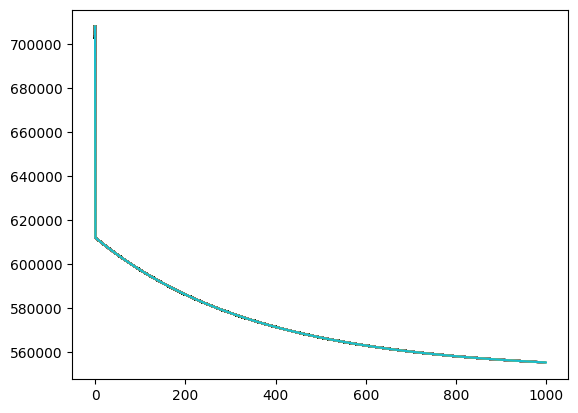

In [13]:
history = list()
epochs = 1000
for epoch in range(epochs):
  total_loss = 0
  for batch in train_dataloader:
    optimizer.zero_grad()
    batch = batch.to(device)
    out = model(batch)
    loss_value = loss(out[:-1,:], batch[1:,:])
    loss_value.backward()
    optimizer.step()
    total_loss += loss_value.item()
  history.append(total_loss / len(train_dataloader))
  plt.plot(history)

In [14]:
history[-1]**0.5

745.2428744843197

In [15]:
batch = next(iter(test_dataloader)).to(device)
batch[1]

tensor([3.4334e+02, 5.8920e+03, 7.0995e+01, 4.6810e+00, 2.3978e+04, 6.7245e+03,
        5.5015e+03, 3.2965e+02, 1.9248e+03, 1.2630e+04, 5.6810e+02, 3.3351e+02,
        3.3300e+01, 5.1000e+02, 1.6308e+03], device='cuda:0')

In [16]:
out = model(batch)
out[0]

tensor([2.7788e+02, 4.8272e+03, 5.4405e+01, 4.2971e+00, 2.1312e+04, 5.6425e+03,
        5.4246e+03, 3.0333e+02, 1.6143e+03, 1.1581e+04, 4.9078e+02, 2.8808e+02,
        3.1658e+01, 4.6584e+02, 1.4524e+03], device='cuda:0',
       grad_fn=<SelectBackward0>)